In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [41]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


Masalah, Solusi dan Analisis

Masalahnya yaitu bank ingin tetap mempertahankan dan meningkatkan nasabah
Analisisnya, ketertarikan orang-orang dalam menggunakan jasa, akan terlihat dari banyaknya interaksi dengan pemberi jasa.
Solusinya dengan menggunakan klasifikasi untuk melihat orang yang tertarik menggunakan layanan jasa

Data Cleaning, Feature selection, & Feature Engineering

In [42]:
df = df.dropna()

In [43]:
df_encoded = df.copy()

In [44]:
#categorical_cols = ['job', 'housing', 'loan', 'month', 'poutcome']
#df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)
categorical_cols = ['job', 'housing', 'loan', 'month', 'poutcome', 'contact']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # One-Hot Encoding


In [45]:
unique_categories = df['job'].unique()
print(unique_categories)

['admin.' 'self-employed' 'services' 'housemaid' 'technician' 'management'
 'student' 'blue-collar' 'entrepreneur' 'retired' 'unemployed' 'unknown']


In [46]:
unique_categories1 = df['month'].unique()
print(unique_categories1)

['jun' 'apr' 'may' 'nov' 'jan' 'sep' 'feb' 'mar' 'aug' 'jul' 'oct' 'dec']


In [47]:
unique_categories = df['loan'].unique()
print(unique_categories)

['no' 'yes']


In [48]:
unique_categories = df['housing'].unique()
print(unique_categories)

['no' 'yes']


In [49]:
unique_categories = df['poutcome'].unique()
print(unique_categories)

['unknown' 'other' 'failure' 'success']


In [50]:
# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop(columns=['deposit'])  # Semua fitur kecuali target
y = df_encoded['deposit'].map({'yes': 1, 'no': 0})  # Konversi Yes/No ke 1/0

Analytics (Algorithm & Evaluation Metrics)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.2)

In [53]:
logreg_model = LogisticRegression().fit(X=X_train, y=y_train)

C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
# Inisialisasi & training model regresi logistik
model = LogisticRegression(C=0.1, solver='liblinear', max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=500, solver='liblinear')

In [55]:
y_pred = logreg_model.predict(X=X_train)

Evaluasi

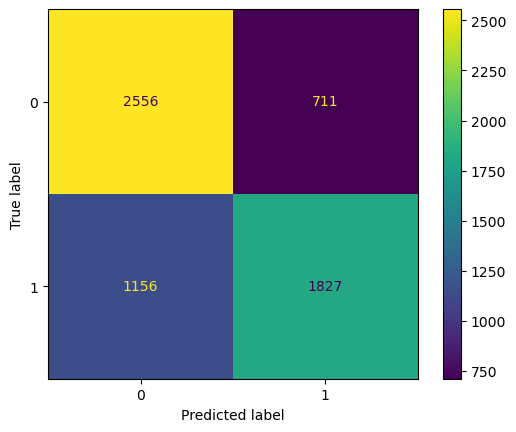

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

classification_confusion_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)
disp = ConfusionMatrixDisplay(classification_confusion_matrix)
disp.plot()
plt.show()

In [57]:
print(classification_confusion_matrix)

[[2556  711]
 [1156 1827]]


In [58]:
# Ambil nama fitur setelah encoding
feature_names = X_train.columns

# Ambil koefisien dari model
coefficients = logreg_model.coef_[0]

# Buat dataframe untuk analisis
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Urutkan berdasarkan dampak terbesar
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Tampilkan hasil
print(coef_df)

              Feature  Coefficient
29   poutcome_success     1.905284
26          month_oct     0.738523
23          month_mar     0.696379
11        job_student     0.593621
27          month_sep     0.570716
22          month_jun     0.356373
8         job_retired     0.300781
18          month_dec     0.224472
13     job_unemployed     0.180270
12     job_technician     0.013304
3               pdays     0.000651
1             balance     0.000046
0                 age    -0.002867
28     poutcome_other    -0.005637
7      job_management    -0.023357
4     job_blue-collar    -0.038423
10       job_services    -0.045370
2            campaign    -0.064303
14        job_unknown    -0.071429
9   job_self-employed    -0.082191
5    job_entrepreneur    -0.095981
19          month_feb    -0.112913
30   poutcome_unknown    -0.125912
6       job_housemaid    -0.231318
24          month_may    -0.234580
31  contact_telephone    -0.296920
21          month_jul    -0.443484
20          month_ja

In [59]:
accuracy_manual = (classification_confusion_matrix[1][1]+classification_confusion_matrix[0][0])/(classification_confusion_matrix[1][1]+classification_confusion_matrix[0][0]+classification_confusion_matrix[0][1]+classification_confusion_matrix[1][0])
print(accuracy_manual)

0.70128


In [60]:
from sklearn.metrics import accuracy_score

accuracy_sklearn = accuracy_score(y_true=y_train, y_pred=y_pred)
print(accuracy_sklearn)

0.70128


In [61]:
recall_manual = (classification_confusion_matrix[1][1])/(classification_confusion_matrix[1][1]+classification_confusion_matrix[1][0])
print(recall_manual)

0.612470667113644


In [62]:
from sklearn.metrics import recall_score

recall_sklearn = recall_score(y_true=y_train, y_pred=y_pred)
print(recall_sklearn)

0.612470667113644


In [63]:
precision_manual = (classification_confusion_matrix[1][1])/(classification_confusion_matrix[1][1]+classification_confusion_matrix[0][1])
print(precision_manual)

0.7198581560283688


In [64]:
from sklearn.metrics import precision_score
precision_sklearn = precision_score(y_true=y_train, y_pred=y_pred)
print(precision_sklearn)

0.7198581560283688


In [65]:
F1_manual = (2*(precision_manual*recall_manual))/(precision_manual+recall_manual)
print(F1_manual)

0.6618366238000362


In [66]:
from sklearn.metrics import f1_score

F1_sklearn = f1_score(y_true=y_train, y_pred=y_pred)
print(F1_sklearn)

0.6618366238000363


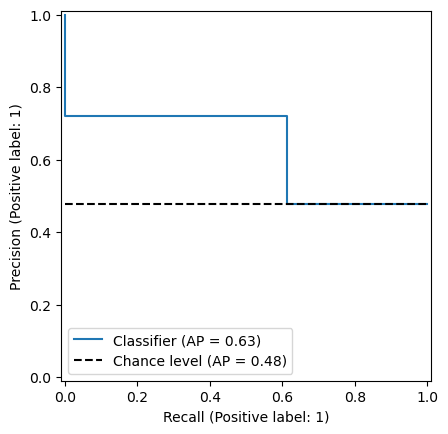

In [67]:
from sklearn.metrics import PrecisionRecallDisplay

PR_display = PrecisionRecallDisplay.from_predictions(y_true=y_train, y_pred=y_pred, plot_chance_level=True)
plt.show(PR_display)

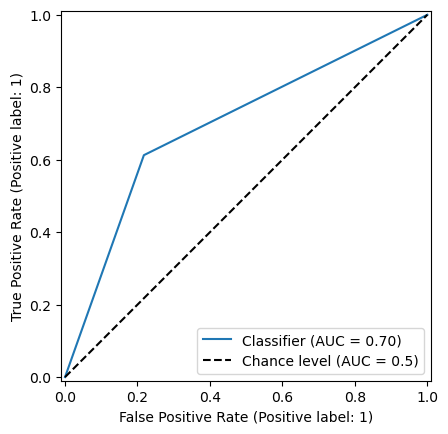

In [68]:
from sklearn.metrics import RocCurveDisplay

ROC_display = RocCurveDisplay.from_predictions(y_true=y_train, y_pred=y_pred, plot_chance_level=True)
plt.show(ROC_display)

 Conclusion and Recommendation

Kesimpulan dari masalah ini yaitu, model Regresi Logistik dapat digunakan untuk mencari orang-orang yang kemungkinan besar ingin menggunakan jasa ini melalui tingkat interaksinya dengan perusahaan bank ini. Berdasarkan confusion matrix, False Positive banyak dipengaruhi oleh fitur dnegan koefisien positif tinggi seperti poutcome success dan month. False Negative banyak dipengaruhi oleh fitur dnegan koefisien positif tinggi seperti contact unknown dan month. Model ini baik digunakan ketika memprediksi calon pelanggan berdasarkan jumlah hari setelah klien mengontak dari kampanye sebelumnya, usia dan saldo rekening di bank. Meskipun begitu, melakukan kampanye lebih banayk pada bulan-bulan tertentu juga baik karena klien pada bulan-bulan tertentu lebih tertarik untuk memberi deposit. Agar model ini bisa lebih baik, kedepannya perlu dicari tahu lagi apa yang menyebabkan bulan-bulan dan pekerjaan tertentu berpengaruh pada mau tidaknya klien memberi deposit karena bulan dan pekerjaan memiliki rentang luas pada faktor yang menyebabkan false positif dan false negatif.